# <center><img src="https://raw.githubusercontent.com/facebookresearch/detectron2/master/.github/Detectron2-Logo-Horz.svg"><center/>

<h2><center> <a href="https://github.com/facebookresearch/detectron2">Detectron2</a> is a PyTorch based modular object detection library</center></h2>

<h4 style="text-align: right, line-height: 3.5em;"> Detectron 2 is a next-generation open-source object detection system from Facebook AI Research. It can be used to train various state-of-the-art models like <a href="http://densepose.org/">Densepose </a> and <a href="https://ai.facebook.com/blog/improving-scene-understanding-through-panoptic-segmentation/">panoptic feature pyramid networks</a> for detection tasks such as bounding-box detection, instance and semantic segmentation, and person keypoint detection. With a modular design, Detectron2 is flexible and extensible, and able to provide fast training on single or multiple GPU servers. </h4>
    
    
<h4> I hope that releasing Detectron2 will continue to accelerate progress in the area of object detection and segmentation. This Kernel is my attempt of contributing to the progress. </h4>   

### Installation
* Most of the libraries required for visualization like [skimage](https://scikit-image.org/docs/dev/api/skimage.html) and [matplotlib](https://matplotlib.org/) come preinstalled in kaggle environment.
* One library required to visualize COCO dataset is [Pycocotools]() which can be installed using the following command.
`pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI`

In [27]:
%pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
%pip install matplotlib
%pip install pycocotools
%pip install scikit-image
%pip install tensorboard
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'"
Hint: = is not a valid operator. Did you mean == ?
You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


### <h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Import Libraries</center></h3>

In [28]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Set constant variables</center></h3>

In [29]:
# I am visualizing some images in the 'val/' directory

dataDir='input/coco-car-damage-detection-dataset/val'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "input/coco-car-damage-detection-dataset/img"

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Initialize the COCO API</center></h3>

In [30]:
# initialize coco api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Display damage categories and supercategories</center></h3>

In [31]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [32]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds);

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [33]:
random_img_id = random.choice(imgIds)
print(random_img_id)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

2
2 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [34]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
print(imgId)
img = coco.loadImgs(imgId)[0]
img = {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '76.jpg', 'flickr_url': '', 'height': 1024, 'id': 8, 'license': 1, 'width': 1024}
print(img)
print("Image details \n",img)

[2]
{'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '82.jpg', 'flickr_url': '', 'height': 1024, 'id': 8, 'license': 1, 'width': 1024}
Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '82.jpg', 'flickr_url': '', 'height': 1024, 'id': 8, 'license': 1, 'width': 1024}


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Raw Image</center></h3>

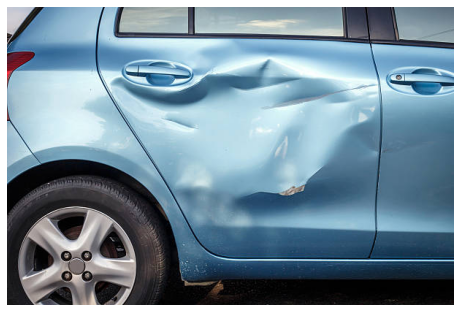

In [35]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with damage annotation</center></h3>

In [36]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)
print(anns)

[{'area': 1115.999999999996, 'bbox': [202, 452, 25, 88], 'category_id': 1, 'id': 4, 'image_id': 2, 'iscrowd': 0, 'segmentation': [[224, 452, 213, 483, 214, 514, 202, 532, 202, 540, 221, 509, 226, 485, 227, 472]]}, {'area': 33194.00000000001, 'bbox': [196, 620, 362, 366], 'category_id': 1, 'id': 5, 'image_id': 2, 'iscrowd': 0, 'segmentation': [[223, 657, 291, 662, 330, 630, 344, 620, 415, 653, 453, 675, 505, 695, 508, 704, 503, 736, 501, 748, 535, 774, 558, 789, 521, 862, 506, 924, 503, 960, 478, 986, 447, 980, 414, 978, 377, 971, 344, 953, 323, 911, 313, 901, 289, 893, 257, 869, 230, 852, 212, 810, 203, 789, 196, 747, 196, 702, 207, 672]]}]


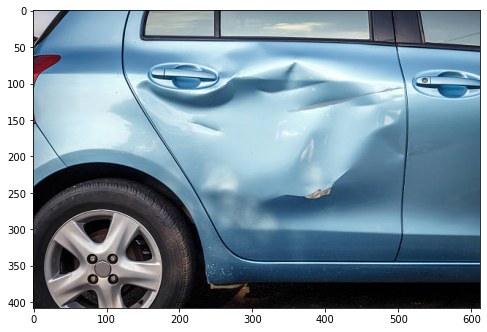

In [37]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with parts annotation</center></h3>

In [38]:
#get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [39]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [40]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['rear_bumper', 'headlamp', 'door']


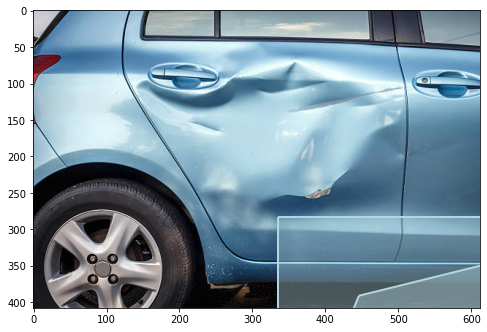

In [41]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Training Object detection model using Detectron 2</center></h2>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Installation </center></h3>

In [42]:
# Install detectron 2
!python -m pip install detectron2 -f "git+https://github.com/facebookresearch/detectron2.git" --user
%pip install torch 
%pip install torchvision 
%pip install torchaudio
%pip install tabulate
%pip install opencv-python

Looking in links: git+https://github.com/facebookresearch/detectron2.git


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Import Libraries required for training</center></h3>

In [43]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cpu False


In [44]:
print(torch.__version__)
# assert torch.__version__.startswith("1.7")

1.11.0+cpu


In [45]:
import detectron2
# from detectron2.utils.logger import setup_logger
# setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [46]:
# To find out inconsistent CUDA versions, if there is not "failed" word in this output then things are fine.
!python -m detectron2.utils.collect_env

---------------------  --------------------------------------------------------------------------------
sys.platform           win32
Python                 3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]
numpy                  1.22.4
detectron2             0.6 @c:\Python310\lib\site-packages\detectron2
Compiler               MSVC 192930137
CUDA compiler          not available
DETECTRON2_ENV_MODULE  <not set>
PyTorch                1.11.0+cpu @c:\Python310\lib\site-packages\torch
PyTorch debug build    False
GPU available          No: torch.cuda.is_available() == False
Pillow                 9.1.1
torchvision            0.12.0+cpu @c:\Python310\lib\site-packages\torchvision
fvcore                 0.1.5.post20220512
iopath                 0.1.9
cv2                    4.6.0
---------------------  --------------------------------------------------------------------------------
PyTorch built with:
  - C++ Version: 199711
  - MSVC 192829337
  - Intel(R) Math 

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Register Car Damage Dataset </center></h3>

In [47]:

dataset_dir = "../input/coco-car-damage-detection-dataset"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"

If you want to use a custom dataset while also reusing detectron2’s data loaders, you will need to

*  Register your dataset (i.e., tell detectron2 how to obtain your dataset).

* Optionally, register metadata for your dataset.

In [48]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_dir,train_dir,"COCO_train_annos.json"), os.path.join(dataset_dir,img_dir))
register_coco_instances("car_dataset_val", {}, os.path.join(dataset_dir,val_dir,"COCO_val_annos.json"), os.path.join(dataset_dir,img_dir))

AssertionError: Dataset 'car_dataset_train' is already registered!

In [ ]:
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")

FileNotFoundError: [Errno 2] No such file or directory: '../input/coco-car-damage-detection-dataset\\train/COCO_train_annos.json'

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Train </center></h2>

In [ ]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation 
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

NameError: name 'DefaultTrainer' is not defined

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 800 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600, 800)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class (damage) + 1
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
#TODO add timestamp to logs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

NameError: name 'get_cfg' is not defined

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Model Metrics and Hyper Parameters Visualization </center></h3>

In [ ]:
# Look at training curves in tensorboard:
# %reload_ext tensorboard
# %tensorboard --logdir ./output

### Note: Unfortunately, there is some issue with tensorboard in Kaggle so I thought of using seaborn to visualize the plots.

Source: https://www.kaggle.com/product-feedback/89671#764494

In [ ]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [ ]:
plots = plot(logdir= './output', savedir= './')

In [ ]:
plots

[]

In [ ]:
my_dpi = 1000
fig, ax = plt.subplots(4,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Bounding Box Average Precision', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

ax[2].set_title('Segmentation Average Precision', fontsize=12)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[3].set_title('Class accuracy', fontsize=12)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

FileNotFoundError: [Errno 2] No such file or directory: './seaborn/total_loss.png'

* I think the training worked well as the loss has decreased over the runs.
* The class accuracy and average precision has improved over the runs.

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Evaluation </center></h2>

In [ ]:
evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

NameError: name 'COCOEvaluator' is not defined

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Inference </center></h2>

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_val", )
predictor = DefaultPredictor(cfg)

NameError: name 'cfg' is not defined

In [ ]:
val_dataset_dicts = DatasetCatalog.get("car_dataset_val")
val_metadata_dicts = MetadataCatalog.get("car_dataset_val")

NameError: name 'DatasetCatalog' is not defined

NameError: name 'val_dataset_dicts' is not defined

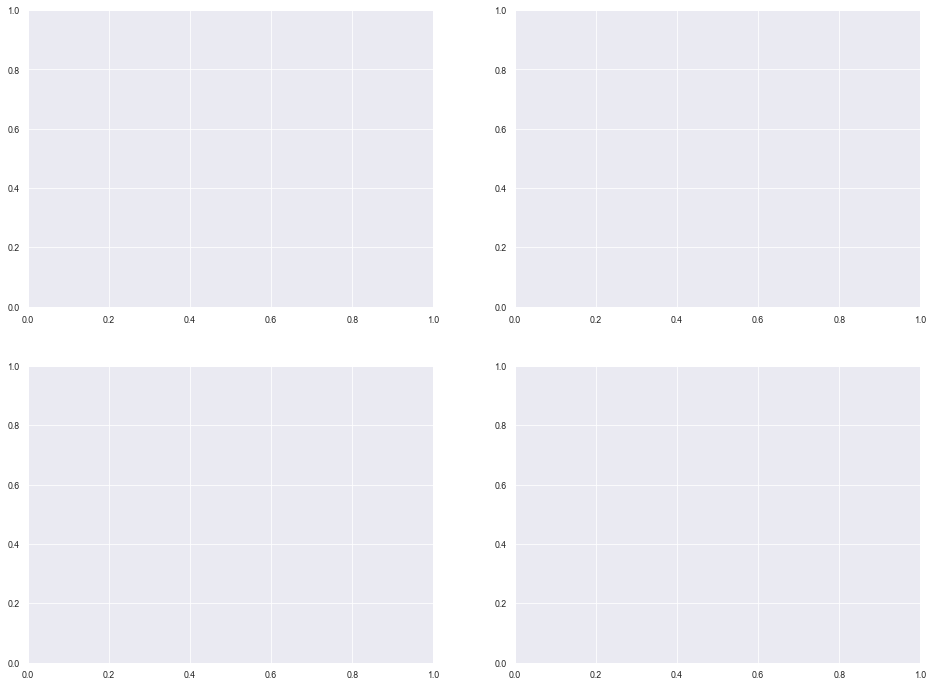

In [ ]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(val_dataset_dicts, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata_dicts, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])

### Conclusion
* I think the results are quite fine even when the training data was around 60 images.
* Data augmentation can significantly improve the results.
* I will try doing multiclass object detection next.

### Do give this notebook an upvote if you liked my work, thanks!